In [1]:
import xarray as xr
import cfgrib
import numpy as np 
import netCDF4
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
cerra = "/home/stefano/Public/climate_comparison/data/cerra_windspeed_2009_reproj.grib"
ds_grib_cerra = xr.open_dataset(cerra)

In [3]:
ds_grib_cerra

<xarray.Dataset>
Dimensions:            (time: 730, latitude: 256, longitude: 256)
Coordinates:
  * time               (time) datetime64[ns] 2009-01-01 ... 2009-12-31T12:00:00
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 35.0 35.05 35.1 ... 47.65 47.7 47.75
  * longitude          (longitude) float64 6.0 6.05 6.1 ... 18.65 18.7 18.75
    valid_time         (time) datetime64[ns] ...
Data variables:
    si10               (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2023-12-16T17:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
df_cerra = ds_grib_cerra.to_dataframe()

In [5]:
df_cerra.head()

step  heightAboveGround valid_time      si10
time       latitude longitude                                               
2009-01-01 35.0     6.00      0 days               10.0 2009-01-01  1.623582
                    6.05      0 days               10.0 2009-01-01  1.684129
                    6.10      0 days               10.0 2009-01-01  2.046677
                    6.15      0 days               10.0 2009-01-01  2.295945
                    6.20      0 days               10.0 2009-01-01  2.035447

In [6]:
df_cerra = df_cerra.reset_index()
df_cerra = df_cerra.drop(columns=['step', 'heightAboveGround', "valid_time"])
df_cerra.rename(columns={"si10": "wind_speed"}, inplace=True)

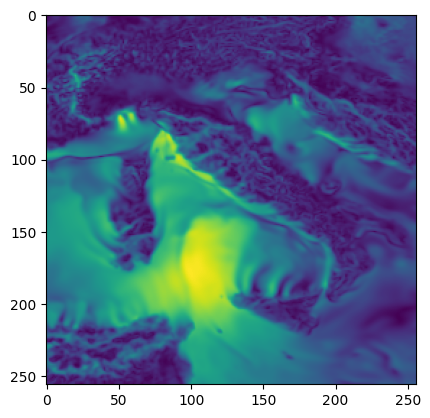

In [12]:
df_era_first = df_cerra.iloc[:(256*256)]
# keep only the values of the wind speed
df_era_first = df_era_first.drop(columns=['latitude', 'longitude'])
# transform the dataframe wind_speed column into an array
first_array = df_era_first.to_numpy()
first_arraylist = []
for i in range(0,(256*256)):
    first_arraylist.append(first_array[i][1])
first_array = np.array(first_arraylist)
first_array = first_array.reshape(256,256)
plt.imshow(first_array[::-1,:])
plt.imsave('test.png', first_array[::-1,:])

In [9]:
df_cerra.head()

,time,latitude,longitude,wind_speed
0,2009-01-01,35.0,6.00,1.623582
1,2009-01-01,35.0,6.05,1.684129
2,2009-01-01,35.0,6.10,2.046677
3,2009-01-01,35.0,6.15,2.295945
4,2009-01-01,35.0,6.20,2.035447


In [10]:
df_cerra.to_csv("cerra_italy_windspeed_2009_csv.csv")